<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston.data,columns = boston.feature_names)

In [4]:
df['target'] = pd.DataFrame(boston.target,columns=['target'])

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

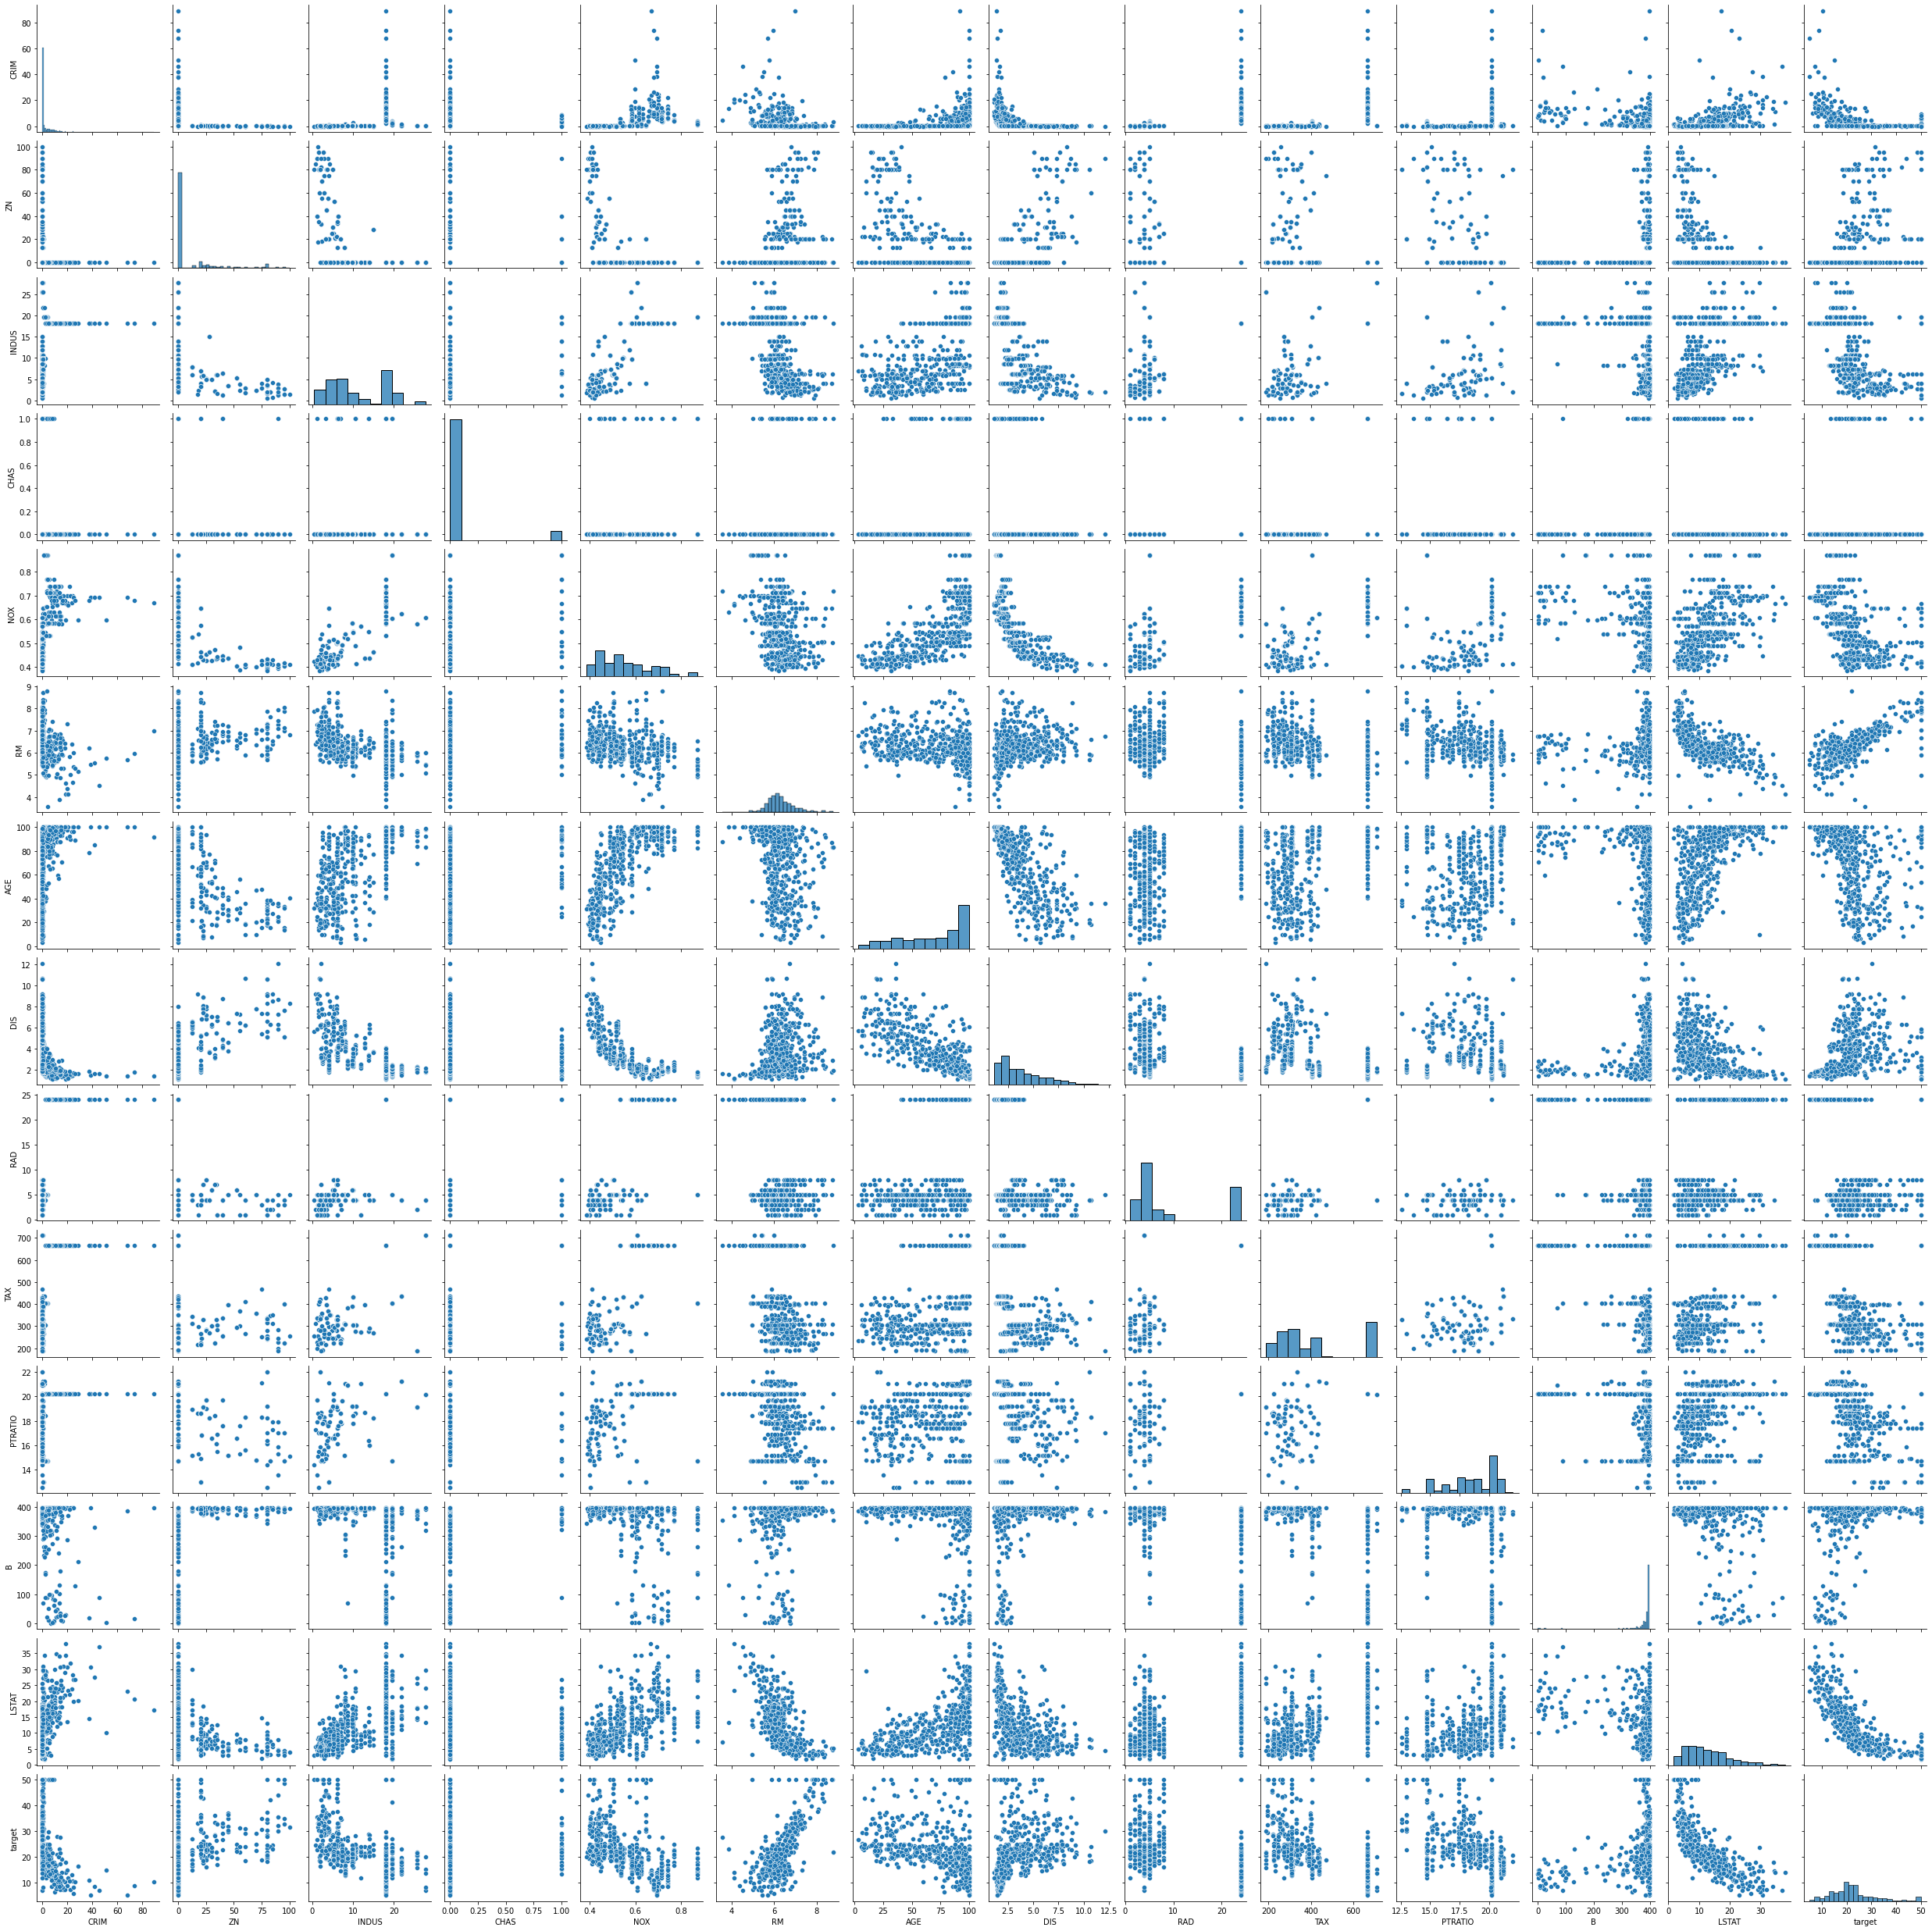

In [10]:
sns.pairplot(df)
plt.show()

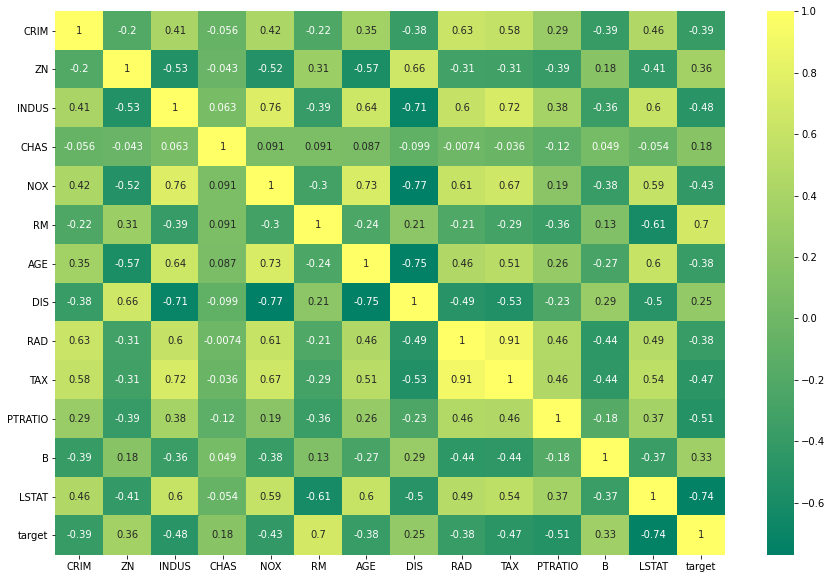

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

target과의 상관계수
<p>상관계수가 높은 것 LSTAT,RM</p>
어느정도 상관이 있는 것 INDUS, NOX, TAX, PTRATIO

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['target'],axis=1)
y = df['target']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [15]:
print(X_train.shape,y_train.shape)

(379, 13) (379,)


In [16]:
!pip install catboost

     |████████████████████████████████| 69.2MB 43kB/s 


In [17]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [18]:
xgb = XGBRegressor()

In [19]:
xgb.fit(X_train,y_train)

[00:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

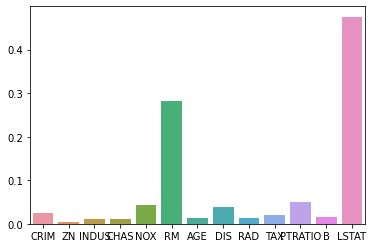

In [20]:
sns.barplot(y = xgb.feature_importances_,x = boston.feature_names)
plt.show()

In [21]:
predict = xgb.predict(X_test)
predict

array([23.016954 , 31.42364  , 16.173046 , 23.580927 , 17.46015  ,
       22.1714   , 18.314796 , 14.029961 , 20.737488 , 21.180895 ,
       20.44529  , 18.690483 ,  8.321284 , 21.453217 , 20.421919 ,
       24.553173 , 19.685305 , 10.205381 , 44.475704 , 15.940252 ,
       23.858517 , 23.737234 , 13.884621 , 20.765696 , 15.456101 ,
       16.24305  , 21.799377 , 13.161657 , 19.93968  , 21.674849 ,
       19.766438 , 23.370852 , 23.209932 , 19.655743 , 15.145709 ,
       16.75448  , 32.84218  , 20.021385 , 20.638344 , 23.61842  ,
       17.877428 , 30.510242 , 43.739815 , 20.179007 , 22.488018 ,
       14.906468 , 16.279074 , 23.69828  , 18.070068 , 26.881145 ,
       20.835695 , 35.763424 , 16.517195 , 25.812237 , 47.97466  ,
       21.505997 , 16.060717 , 31.166424 , 21.966013 , 18.112715 ,
       22.984049 , 34.817833 , 30.661045 , 19.36766  , 25.49301  ,
       18.369967 , 14.297357 , 23.17898  , 28.338715 , 14.903171 ,
       21.480898 , 28.35976  , 10.96798  , 21.158417 , 22.4448

In [22]:
xgb.score(X_train,y_train)

0.9757544258022435

In [23]:
xgb.score(X_test,y_test)

0.8554991705577768

In [24]:
cb = CatBoostRegressor()

In [25]:
cb.fit(X_train,y_train)

Learning rate set to 0.03284
0:	learn: 9.2232263	total: 48.8ms	remaining: 48.8s
1:	learn: 9.0279390	total: 50.8ms	remaining: 25.4s
2:	learn: 8.8478875	total: 52.8ms	remaining: 17.6s
3:	learn: 8.7101671	total: 54.8ms	remaining: 13.6s
4:	learn: 8.5677125	total: 56.8ms	remaining: 11.3s
5:	learn: 8.4330463	total: 58.8ms	remaining: 9.74s
6:	learn: 8.2769547	total: 60.7ms	remaining: 8.62s
7:	learn: 8.1273616	total: 62.7ms	remaining: 7.77s
8:	learn: 7.9854580	total: 64.6ms	remaining: 7.11s
9:	learn: 7.8282373	total: 66.6ms	remaining: 6.59s
10:	learn: 7.6947207	total: 68.5ms	remaining: 6.16s
11:	learn: 7.5410120	total: 70.4ms	remaining: 5.8s
12:	learn: 7.3977540	total: 72.3ms	remaining: 5.49s
13:	learn: 7.2581935	total: 74.3ms	remaining: 5.24s
14:	learn: 7.1487699	total: 76.3ms	remaining: 5.01s
15:	learn: 7.0186103	total: 78.3ms	remaining: 4.81s
16:	learn: 6.9040146	total: 80.4ms	remaining: 4.65s
17:	learn: 6.8013361	total: 82.3ms	remaining: 4.49s
18:	learn: 6.6839892	total: 84.4ms	remaining: 

In [26]:
cb.score(X_train,y_train)

0.996019112881009

In [27]:
cb.score(X_test,y_test)

0.8620454152426535

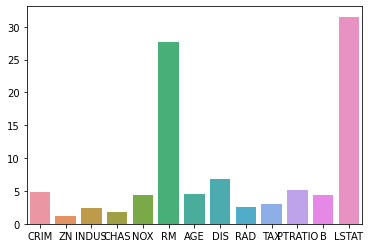

In [28]:
sns.barplot(y= cb.get_feature_importance(),x=boston.feature_names)
plt.show()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eglikaggle","key":"6766e8222388bb5ba34b58ee176da715"}'}

In [31]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
#permission warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [32]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        207           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        343           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        991           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       6265           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      52807            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      13804            True  
connectx

In [33]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.27MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 34.8MB/s]


In [34]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [35]:
df = pd.concat([train,test],axis=0)

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
pd.read_csv('/content/gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [42]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [43]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [44]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
np.unique(df['Ticket'],return_counts=True)

(array(['110152', '110413', '110465', '110469', '110489', '110564',
        '110813', '111163', '111240', '111320', '111361', '111369',
        '111426', '111427', '111428', '112050', '112051', '112052',
        '112053', '112058', '112059', '112277', '112377', '112378',
        '112379', '112901', '113028', '113038', '113043', '113044',
        '113050', '113051', '113054', '113055', '113056', '113059',
        '113501', '113503', '113505', '113509', '113510', '113514',
        '113572', '113760', '113767', '113773', '113776', '113778',
        '113780', '113781', '113783', '113784', '113786', '113787',
        '113788', '113789', '113790', '113791', '113792', '113794',
        '113795', '113796', '113798', '113800', '113801', '113803',
        '113804', '113806', '113807', '11668', '11751', '11752', '11753',
        '11755', '11765', '11767', '11769', '11770', '11771', '11774',
        '11778', '11813', '11967', '1222', '12233', '12460', '12749',
        '13049', '13050', '13213', '1

In [47]:
import re

In [48]:
df['Ticket'] = df['Ticket'].apply(lambda x : re.sub('[^0-9]+','',x))

In [49]:
import seaborn as sns

In [50]:
print(max(df['Age']),min(df['Age']))

80.0 0.17


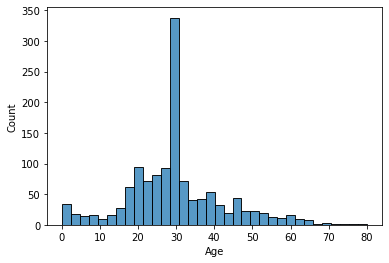

In [51]:
sns.histplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


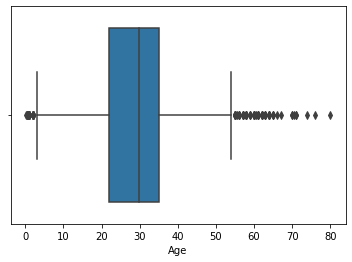

In [52]:
sns.boxplot(df['Age'])
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
lb = LabelEncoder()

In [55]:
df['Sex'] = lb.fit_transform(df['Sex'])

In [56]:
np.unique(df['Sex'],return_counts=True)

(array([0, 1]), array([466, 843]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

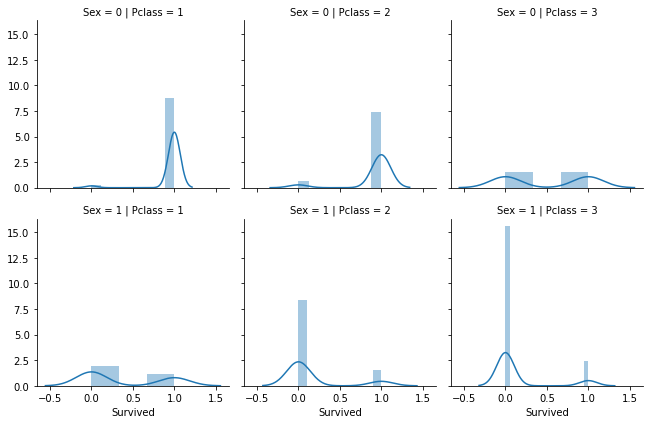

In [57]:
sns.FacetGrid(df,col='Pclass',row='Sex').map(sns.distplot,'Survived')
plt.show()

In [58]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


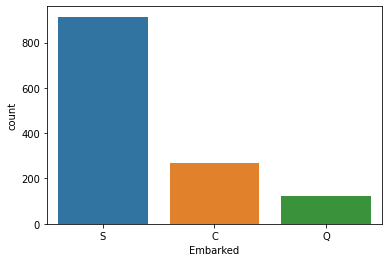

In [59]:
sns.countplot(df['Embarked'])
plt.show()

In [60]:
df['Embarked'] = df['Embarked'].fillna('S')

In [61]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [62]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S


In [63]:
temp = []
for i in range(len(df)):
  temp.append((df['Name'].iloc[i])[(df['Name'].iloc[i]).find(',')+1:(df['Name'].iloc[i].find('.'))])

In [64]:
df['Name_title'] = temp

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,521171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,23101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,29.881138,0,0,53236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,17758,108.9000,C105,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",1,29.881138,0,0,359309,8.0500,NaN,S,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


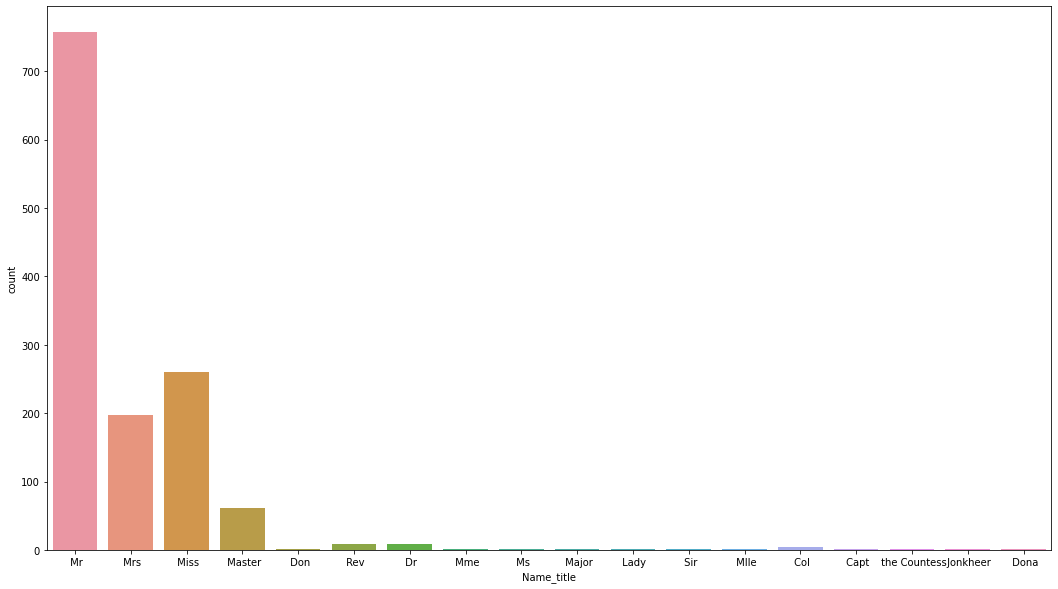

In [66]:
plt.figure(figsize=(18,10))
sns.countplot(df['Name_title'])
plt.show()

In [67]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Name_title        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


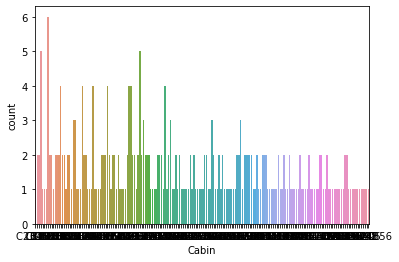

In [68]:
sns.countplot(df['Cabin'])
plt.show()

In [69]:
df['Embarked'] = lb.fit_transform(df['Embarked'])
df['Name_title'] = lb.fit_transform(df['Name_title'])

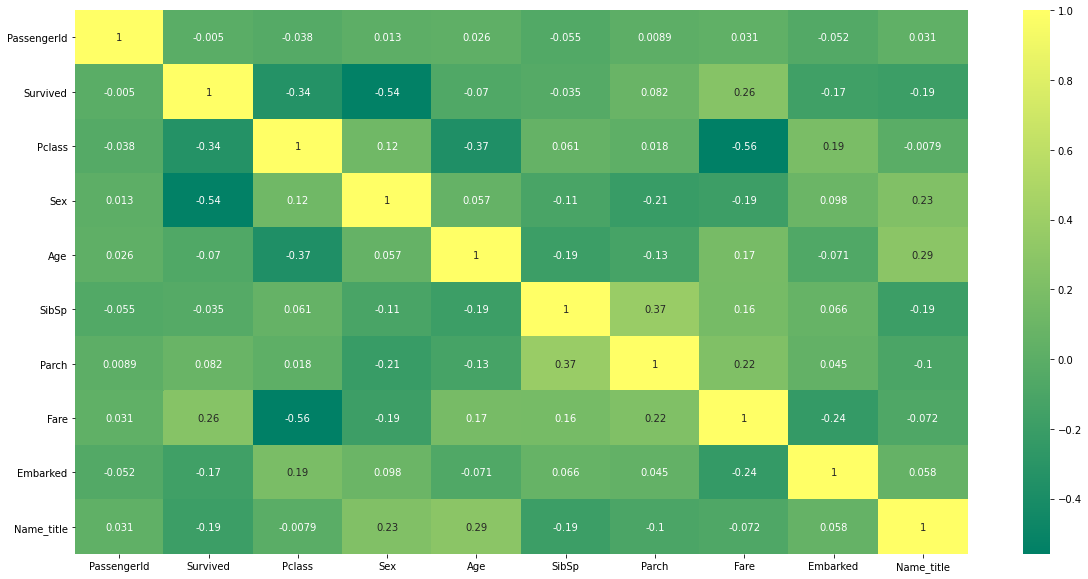

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='summer',annot=True)
plt.show()

In [71]:
temp = df[df['Cabin'].isna()==False]

In [72]:
np.unique(temp['Cabin'],return_counts=True)

(array(['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23',
        'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7',
        'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22',
        'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38',
        'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50',
        'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61',
        'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86',
        'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110',
        'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128',
        'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28',
        'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50',
        'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65',
        'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86',
        'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 

In [73]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,17599,71.2833,C85,0,13
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2,12
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,9549,16.7000,G6,2,9
11,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2,9


In [74]:
temp['Cabin'] = temp['Cabin'].apply(lambda x : re.sub('[0-9]+','',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,17599,71.2833,C,0,13
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,2,13
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E,2,12
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,9549,16.7000,G,2,9
11,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,D,0,12
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,2166,13.8625,D,0,12
407,1299,NaN,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,C,0,12
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C,1,13


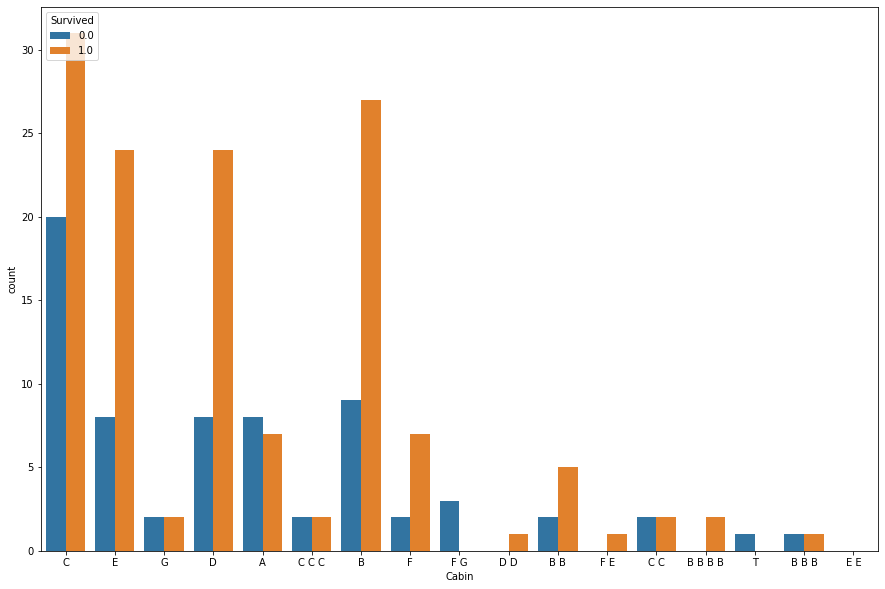

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='Cabin',hue='Survived',data=temp)
plt.show()

In [77]:
temp[temp['Cabin']=='C']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,17599,71.2833,C,0,13
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C,2,13
11,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,113783,26.5500,C,2,9
55,56,1.0,1,"Woolner, Mr. Hugh",1,29.881138,0,0,19947,35.5000,C,2,12
62,63,0.0,1,"Harris, Mr. Henry Birkhardt",1,45.000000,1,0,36973,83.4750,C,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1287,NaN,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",0,18.000000,1,0,13695,60.0000,C,2,13
400,1292,NaN,1,"Bonnell, Miss. Caroline",0,30.000000,0,0,36928,164.8667,C,2,9
407,1299,NaN,1,"Widener, Mr. George Dunton",1,50.000000,1,1,113503,211.5000,C,0,12
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.000000,1,0,19928,90.0000,C,1,13


In [78]:
temp['Cabin'] = temp['Cabin'].apply(lambda x: x.split(' ')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
np.unique(temp['Cabin'],return_counts=True)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array([22, 65, 94, 46, 41, 21,  5,  1]))

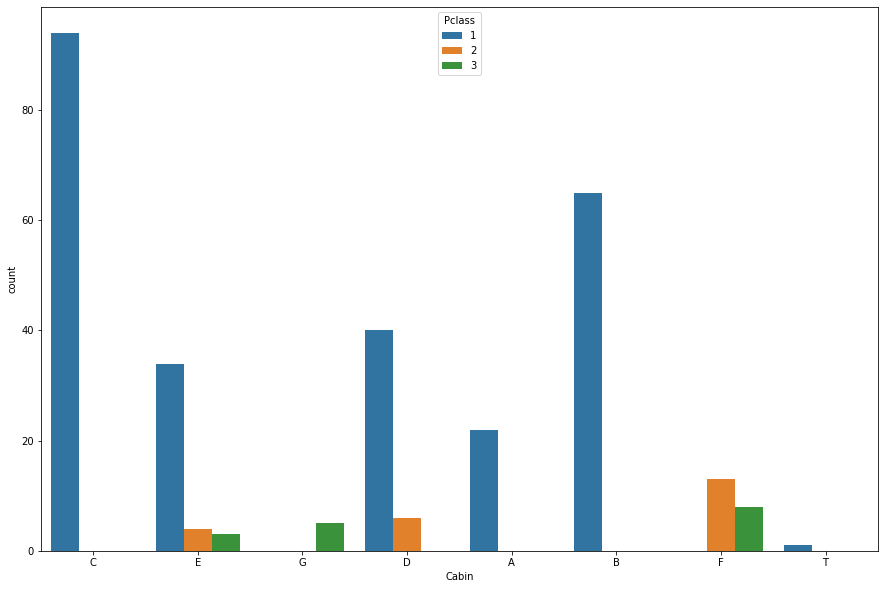

In [80]:
plt.figure(figsize=(15,10))
sns.countplot(x='Cabin',hue='Pclass',data=temp,)
plt.show()

1등석은 C,D,A,B,T,E<br>
2등석은 E,D,F <br>
3등석은 E,G,F<br>
원래대로라면 각자 가중치를 클래스별로 가중치를 부여하여 Cabin에 넣는 게 맞겠지만 그냥 가장 높은 거 4개 뽑아서 랜덤을 돌렸음

In [81]:
temp['Cabin'] = lb.fit_transform(temp['Cabin'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


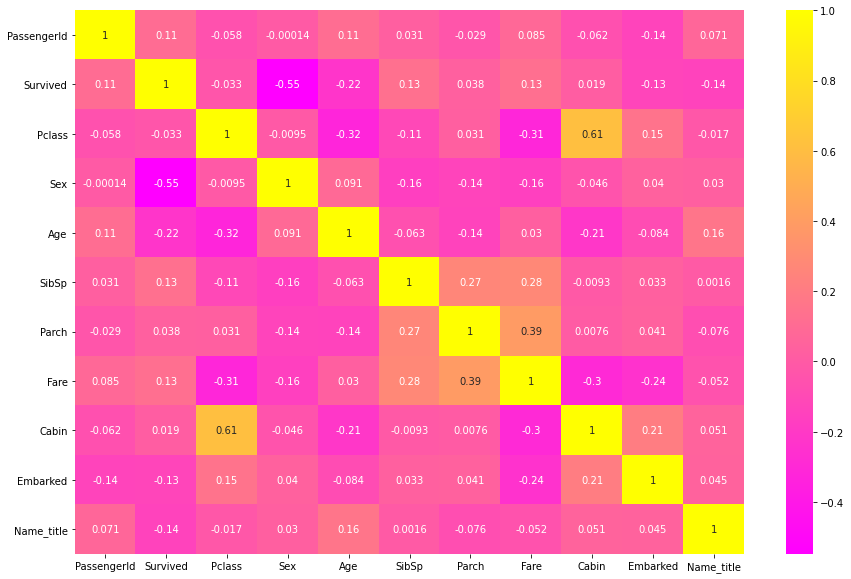

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(temp.corr(),annot=True,cmap='spring')
plt.show()

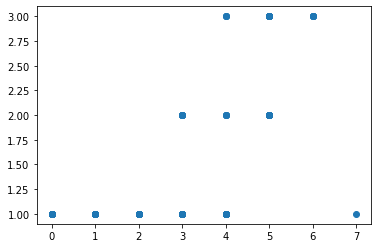

In [83]:
plt.scatter(temp['Cabin'],temp['Pclass'])
plt.show()

In [84]:
temp[temp['Survived'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
12,904,NaN,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,1,2,13
14,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,5734,61.1750,4,2,13
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,17608,262.3750,1,0,13
26,918,NaN,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,1,0,9
28,920,NaN,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,3,0,12
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,2166,13.8625,3,0,12
407,1299,NaN,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,2,0,12
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,2,1,13


In [85]:
temp.loc[:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,17599,71.2833,2,0,13
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2,13
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,4,2,12
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,9549,16.7000,6,2,9
11,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,113783,26.5500,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,933,NaN,1,"Franklin, Mr. Thomas Parham",1,29.881138,0,0,113778,26.5500,3,2,12
44,936,NaN,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",0,45.000000,1,0,11753,52.5542,3,2,13
46,938,NaN,1,"Chevre, Mr. Paul Romaine",1,45.000000,0,0,17594,29.7000,0,0,12
48,940,NaN,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",0,60.000000,0,0,11813,76.2917,3,0,13


In [86]:
temp[temp['Survived'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
12,904,NaN,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,1,2,13
14,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,5734,61.1750,4,2,13
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,17608,262.3750,1,0,13
26,918,NaN,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,1,0,9
28,920,NaN,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,3,0,12
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,2166,13.8625,3,0,12
407,1299,NaN,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,2,0,12
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,2,1,13


In [87]:
np.unique(temp['Cabin'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([22, 65, 94, 46, 41, 21,  5,  1]))

In [88]:
import random

In [89]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,521171,7.2500,NaN,2,12
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,17599,71.2833,C85,0,13
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,23101282,7.9250,NaN,2,9
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,13
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,29.881138,0,0,53236,8.0500,NaN,2,12
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,17758,108.9000,C105,0,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,3101262,7.2500,NaN,2,12
416,1308,NaN,3,"Ware, Mr. Frederick",1,29.881138,0,0,359309,8.0500,NaN,2,12


In [90]:
temp_Cabin_num = ['B', 'C', 'D', 'E']
df['Cabin'] = df['Cabin'].fillna(temp_Cabin_num[random.randint(0,3)])

In [91]:
df['Cabin'] = df['Cabin'].apply(lambda x : re.sub('[0-9]+','',x))

In [92]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Name_title       0
dtype: int64

In [93]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
152,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,D,2,12


In [94]:
df['Fare'] = df['Fare'].fillna(np.mean(df[df['Cabin']=='E']['Fare']))

In [95]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Name_title       0
dtype: int64

In [96]:
df['Cabin'] = lb.fit_transform(df['Cabin'])

In [97]:
df[df['Ticket']=='']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
179,180,0.0,3,"Leonard, Mr. Lionel",1,36.0,0,0,,0.0,8,2,12
271,272,1.0,3,"Tornquist, Mr. William Henry",1,25.0,0,0,,0.0,8,2,12
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,,0.0,8,2,12
597,598,0.0,3,"Johnson, Mr. Alfred",1,49.0,0,0,,0.0,8,2,12


In [98]:
df[df['Fare']==0]
# 요금도 없이 탑승하는 것이 가능할까?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
179,180,0.0,3,"Leonard, Mr. Lionel",1,36.000000,0,0,,0.0,8,2,12
263,264,0.0,1,"Harrison, Mr. William",1,40.000000,0,0,112059,0.0,1,2,12
271,272,1.0,3,"Tornquist, Mr. William Henry",1,25.000000,0,0,,0.0,8,2,12
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",1,29.881138,0,0,239853,0.0,8,2,12
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",1,19.000000,0,0,,0.0,8,2,12
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",1,29.881138,0,0,239853,0.0,8,2,12
466,467,0.0,2,"Campbell, Mr. William",1,29.881138,0,0,239853,0.0,8,2,12
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",1,29.881138,0,0,239854,0.0,8,2,12
597,598,0.0,3,"Johnson, Mr. Alfred",1,49.000000,0,0,,0.0,8,2,12
633,634,0.0,1,"Parr, Mr. William Henry Marsh",1,29.881138,0,0,112052,0.0,8,2,12


In [99]:
Pc_3 = np.mean(df[df['Pclass']==3]['Fare'])
Pc_2 = np.mean(df[df['Pclass']==2]['Fare'])
Pc_1 = np.mean(df[df['Pclass']==1]['Fare'])

In [100]:
temp = []
Pc_numb = [Pc_1,Pc_2,Pc_3]
for i in range(len(df['Fare'])):
  if df['Fare'].iloc[i] != 0:
    temp.append(df['Fare'].iloc[i])
  else:
    print(Pc_numb[(df['Pclass'].iloc[i])-1])
    temp.append(Pc_numb[(df['Pclass'].iloc[i])-1])

13.358267207334267
87.5089916408668
13.358267207334267
21.1791963898917
13.358267207334267
21.1791963898917
21.1791963898917
21.1791963898917
13.358267207334267
87.5089916408668
21.1791963898917
21.1791963898917
87.5089916408668
87.5089916408668
87.5089916408668
87.5089916408668
87.5089916408668


In [101]:
df['Fare'] = temp

In [102]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title


In [103]:
df[df['Ticket']=='']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
179,180,0.0,3,"Leonard, Mr. Lionel",1,36.0,0,0,,13.358267,8,2,12
271,272,1.0,3,"Tornquist, Mr. William Henry",1,25.0,0,0,,13.358267,8,2,12
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,,13.358267,8,2,12
597,598,0.0,3,"Johnson, Mr. Alfred",1,49.0,0,0,,13.358267,8,2,12


In [104]:
df['Ticket'] = df['Ticket'].apply(lambda x:x if x!='' else np.NaN)

In [105]:
df['Ticket'] = df['Ticket'].fillna(method='pad')

In [106]:
df[df['Ticket']=='']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
 12  Name_title   1309 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 183.2+ KB


In [108]:
df['Ticket'] = df['Ticket'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Survived'].iloc[:891] = (df['Survived'].iloc[:891]).astype(int)
df['Fare'] = df['Fare'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


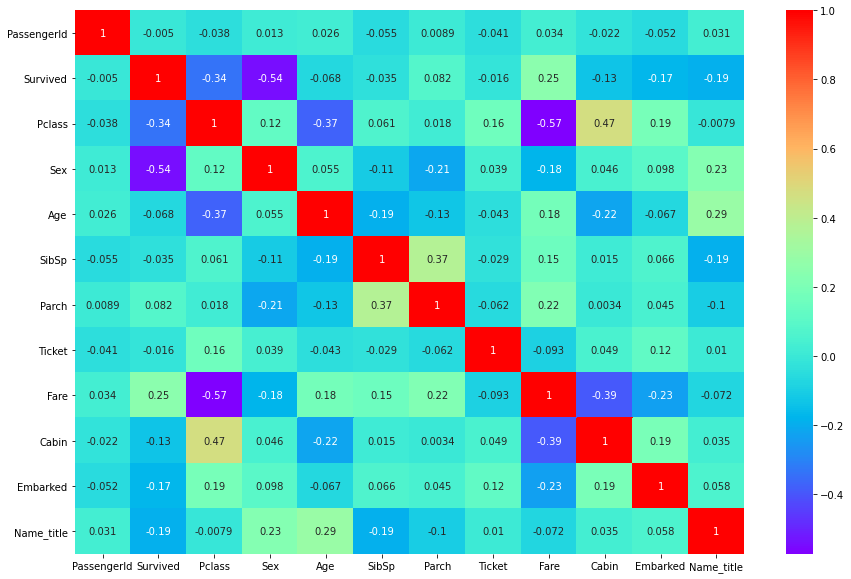

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [110]:
train = df.iloc[:891]
test = df.iloc[891:]

In [111]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,521171,7,8,2,12
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,17599,71,5,0,13
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,23101282,7,8,2,9
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,5,2,13
4,5,0.0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,8,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13,8,2,15
887,888,1.0,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,1,2,9
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,6607,23,8,2,9
889,890,1.0,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,5,0,12


In [112]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,892,NaN,3,"Kelly, Mr. James",1,34,0,0,330911,7,8,1,12
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7,8,2,13
2,894,NaN,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9,8,1,12
3,895,NaN,3,"Wirz, Mr. Albert",1,27,0,0,315154,8,8,2,12
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12,8,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,29,0,0,53236,8,8,2,12
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,17758,108,5,0,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,3101262,7,8,2,12
416,1308,NaN,3,"Ware, Mr. Frederick",1,29,0,0,359309,8,8,2,12


In [113]:
X = train.drop(['PassengerId','Name','Survived'],axis=True)
y = train['Survived']

In [115]:
import statsmodels.api as sm

x_constant = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [116]:
model = sm.OLS(y,x_constant)

In [117]:
lin_reg = model.fit()

In [118]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     59.14
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.48e-91
Time:                        00:42:30   Log-Likelihood:                -392.95
No. Observations:                 891   AIC:                             807.9
Df Residuals:                     880   BIC:                             860.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4357      0.106     13.562      0.000       1.228       1.643
Pclass        -0.1822      0.021     -8.653      0.000      -0.224      -0.141
Sex           -0.4993      0.029    -17.495      0.000      -0.555      -0.443
Age           -0.0054      0.001     -4.870      0.000      -0.008      -0.003
SibSp         -0.0420      0.013     -3.196      0.001      -0.068      -0.016
Parch         -0.0125      0.018     -0.691      0.490      -0.048       0.023
Ticket      8.097e-09   3.79e-09      2.137      0.033     6.6e-10    1.55e-08
Fare           0.0002      0.000      0.466      0.641      -0.001       0.001
Cabin          0.0051      0.007      0.739      0.460      -0.009       0.019
Embarked      -0.0397      0.017     -2.356      0.019      -0.073      -0.007
Name_title    -0.0098      0.007     -1.317      0.188      -0.024       0.005
==============================================================================
Omnibus:                       32.925   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.751
Skew:                           0.488   Prob(JB):                     1.73e-08
Kurtosis:                       3.099   Cond. No.                     2.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다중공성선

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [148]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [121]:
xgb = XGBClassifier()

In [122]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
xgb.score(X_train,y_train)

0.8967065868263473

In [124]:
xgb.score(X_test,y_test)

0.8385650224215246

In [125]:
!pip install Catboost

In [126]:
from catboost import CatBoostClassifier

In [127]:
cb = CatBoostClassifier()

In [128]:
cb.fit(X_train,y_train)

Learning rate set to 0.008672
0:	learn: 0.6874902	total: 10.5ms	remaining: 10.5s
1:	learn: 0.6814466	total: 15.9ms	remaining: 7.93s
2:	learn: 0.6757648	total: 18.4ms	remaining: 6.12s
3:	learn: 0.6699383	total: 20.5ms	remaining: 5.11s
4:	learn: 0.6641487	total: 22.7ms	remaining: 4.51s
5:	learn: 0.6583215	total: 24.8ms	remaining: 4.1s
6:	learn: 0.6539142	total: 27.2ms	remaining: 3.86s
7:	learn: 0.6488637	total: 28.4ms	remaining: 3.52s
8:	learn: 0.6443960	total: 30ms	remaining: 3.3s
9:	learn: 0.6393158	total: 31.3ms	remaining: 3.1s
10:	learn: 0.6344906	total: 33.4ms	remaining: 3s
11:	learn: 0.6307365	total: 35.4ms	remaining: 2.92s
12:	learn: 0.6259878	total: 37.6ms	remaining: 2.85s
13:	learn: 0.6216898	total: 39.7ms	remaining: 2.8s
14:	learn: 0.6176818	total: 41.1ms	remaining: 2.7s
15:	learn: 0.6153032	total: 42.1ms	remaining: 2.59s
16:	learn: 0.6121552	total: 43ms	remaining: 2.49s
17:	learn: 0.6084843	total: 43.7ms	remaining: 2.38s
18:	learn: 0.6045522	total: 44.6ms	remaining: 2.3s
19:	l

In [129]:
cb.score(X_train,y_train)

0.9221556886227545

In [130]:
cb.score(X_test,y_test)

0.8385650224215246

In [131]:
from lightgbm import LGBMClassifier

In [132]:
lgb = LGBMClassifier()

In [133]:
lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [134]:
lgb.score(X_train,y_train)

0.9745508982035929

In [135]:
lgb.score(X_test,y_test)

0.8251121076233184

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [138]:
gbc = GradientBoostingClassifier()

In [139]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
gbc.score(X_train,y_train)

0.9116766467065869

In [141]:
gbc.score(X_test,y_test)

0.8116591928251121

In [155]:
param_grid = {
    'booster': ['gbtree','gblinear','dart'],
    'learning_rate' : [0.1,0.2,0.3]
}

In [156]:
gs = GridSearchCV(xgb,param_grid)

In [157]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=Tr

In [160]:
best_xgb = gs.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [161]:
y_pred = best_xgb.predict(X_test)

In [163]:
xgb.score(X_test,y_pred)

0.9327354260089686

In [169]:
temp = test.drop(['PassengerId','Name','Survived'],axis=True)

In [170]:
y_pred = best_xgb.predict(temp)

In [191]:
Series_2 = pd.Series(test['PassengerId'],name='PassengerId')
Series_2

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [198]:
Series_1 = pd.Series(y_pred.astype(int),name='Survived')
Series_1

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [200]:
(pd.concat([Series_2,Series_1],axis=1)).to_csv('titanic1.csv',index=False)

하이퍼파라미터 조정과 전처리를 좀 더 잘했으면 더 높은 스코어가 나올 것으로 추정

<img src='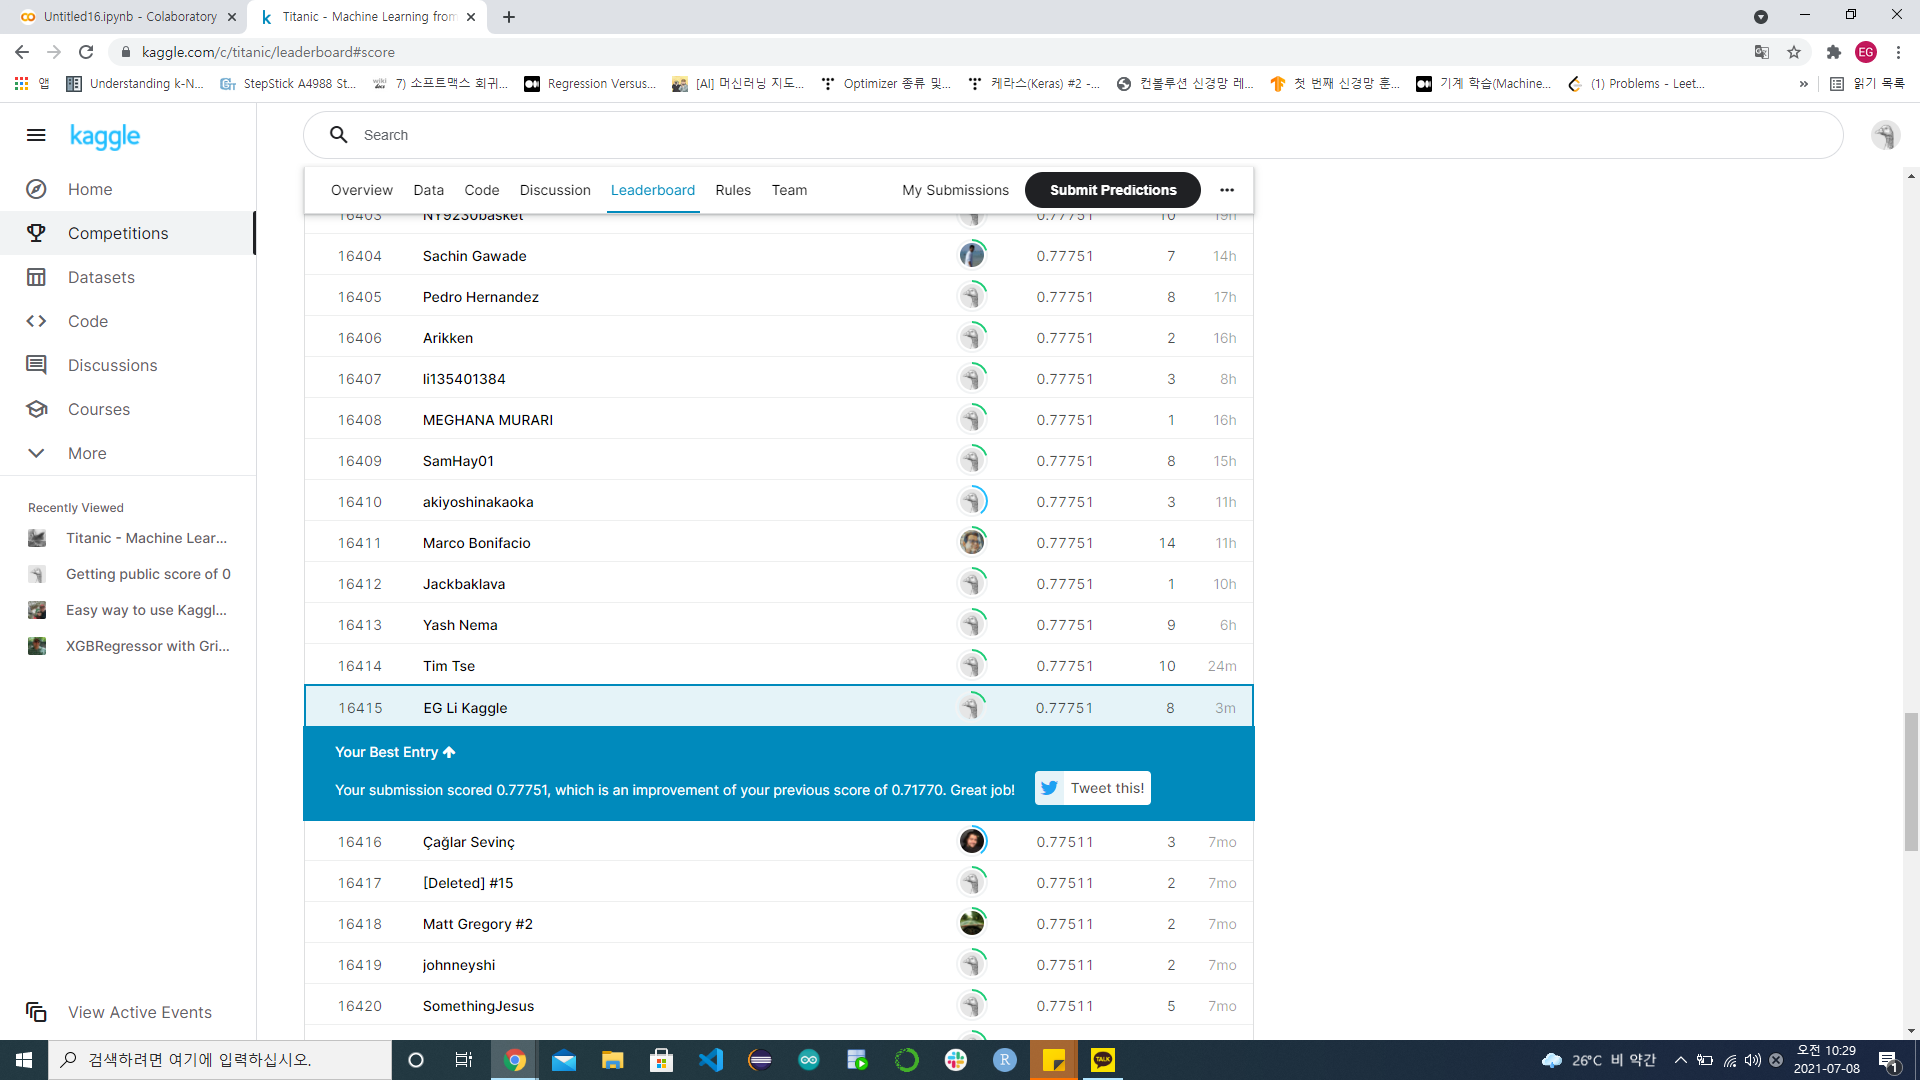'>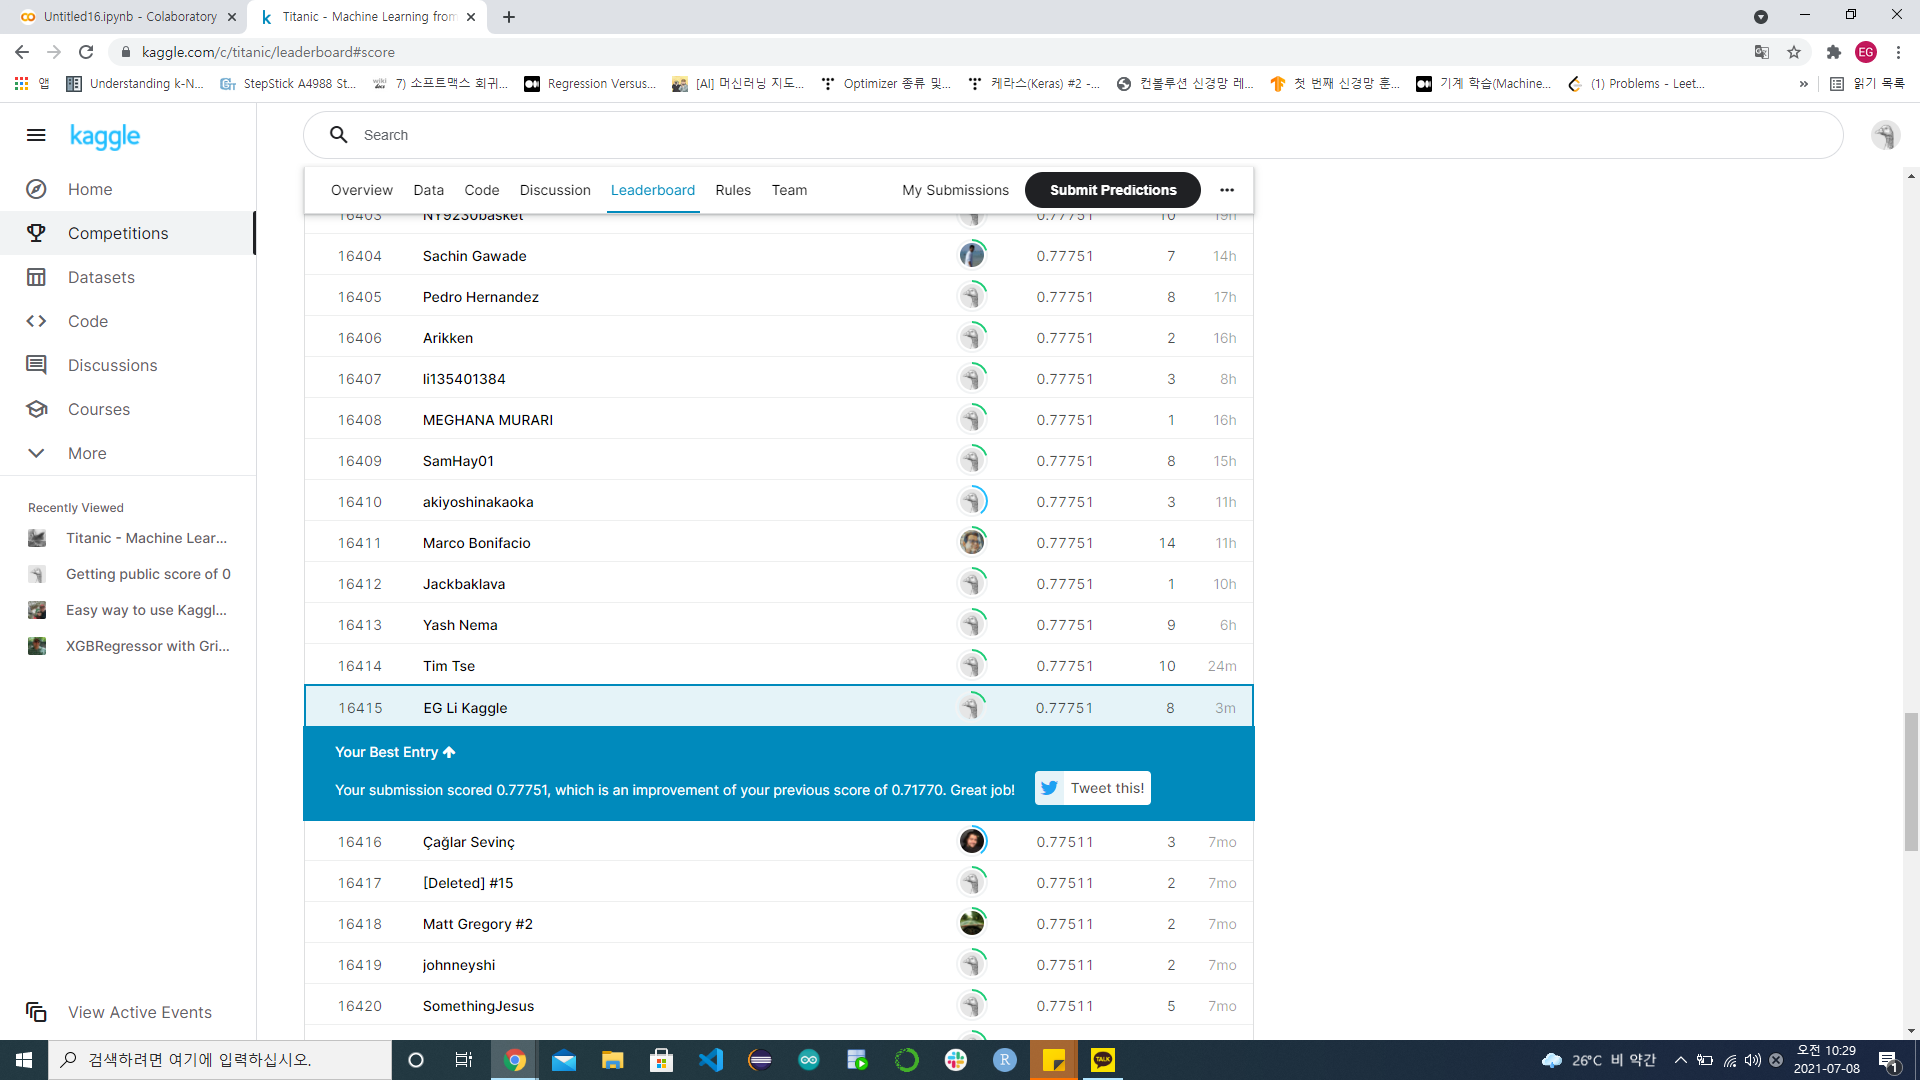